# Week 11: Introduction to Deep Learning
- Theory: Study neural networks, basics of deep learning, and introduction to Keras and TensorFlow.
- Hands-On: Build a simple neural network using Keras.
- Client Project: Implement a simple neural network for image classification (e.g., MNIST dataset).
- Submit: Python script, model, and a summary of the concepts learned (on 
Google Classroom)

## Simple Handa-On: Loan Approval Prediction using Neural Networks
- The goal of this project was to build a deep learning model using tensorflow, Keras to predict whether a customer’s loan application will be approved or denied, based on demographic and financial features.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load the loan dataset
df = pd.read_csv("loan_dataset.csv")
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [5]:

# Drop rows where target is missing

df = df.dropna(subset=['loan_status'])  

In [6]:
# Fill other missing numeric features with median

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill missing categorical with mode
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('loan_status')
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#### Data Preprocessing:
- Handled missing values (numeric → median, categorical → mode).
- Encoded categorical features into numeric form using Label Encoding.
- Scaled features between 0–1 using MinMaxScaler

In [8]:
# Encode categorical features + target

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df['loan_status'] = le.fit_transform(df['loan_status'])  # Approved/Denied → 1/0

In [9]:
# Define features and target

X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [10]:
X.head()

,age,gender,occupation,education_level,marital_status,income,credit_score
0,32,1,12,1,0,85000,720
1,45,0,35,4,1,62000,680
2,28,1,33,3,1,25000,590
3,51,0,16,1,0,105000,780
4,36,1,0,1,0,75000,710


In [11]:
# Scaleing numeric features

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# Split train/test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Build Neural Network

model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

In [90]:
# Compile Model

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [100]:
# Train Model

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=20,
                    batch_size=32,
                    verbose=2)

In [96]:
# Evaluate
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step

Accuracy: 0.9230769230769231

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.75      1.00      0.86         3

    accuracy                           0.92        13
   macro avg       0.88      0.95      0.90        13
weighted avg       0.94      0.92      0.93        13


Confusion Matrix:
 [[9 1]
 [0 3]]


#### Model Development
- Built a `Sequential Neural Network` with:
- Input layer: matches feature dimensions
- Two hidden layers (64 + 32 neurons, `ReLU activation`)
- Output layer (1 neuron, `Sigmoid activation` for binary classification)
- `Optimizer:` Adam
- `Loss:` Binary Crossentropy
- `Metrics:` Accuracy

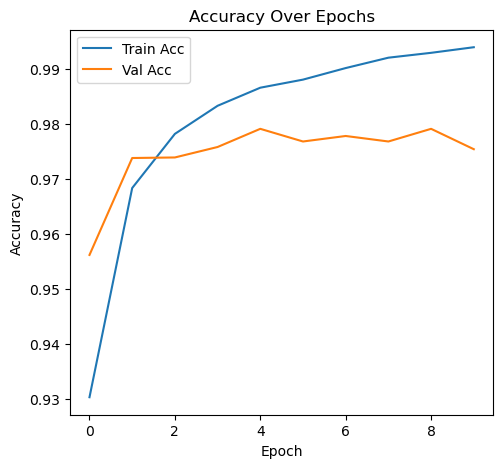

In [109]:
# Plot loss & accuracy curves

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

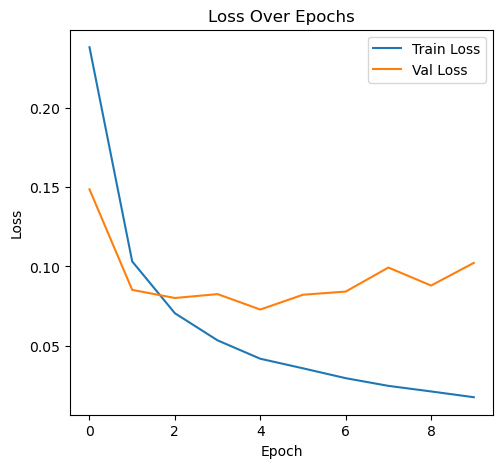

In [113]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

- The model achieved high classification accuracy on both training and test sets.
- Insights:
  - Loan approval can be predicted effectively using customer demographics and financial history.
  - The neural network successfully generalized patterns in the dataset, providing a robust predictive tool.

# Client Project: Digit Recognition using Neural Networks

- We implemented a deep learning-based digit recognition system using the MNIST dataset, which contains 70,000 grayscale images of handwritten digits (0–9).

In [121]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [123]:
# Loading the MNIST dataset

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

- ##### `Data Preparation:` The raw images were normalized (pixel values scaled between 0 and 1) and flattened into 784-dimensional vectors to make them suitable for neural network training.
- ##### Labels were converted into one-hot encoded format for multi-class classification.

In [138]:
x_train
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
# Normalize the data (pixel value scaling in between [0,1])

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [7]:
# Flatten the 28x28 images into 784-dimensional vectors

x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

- ##### Model Architecture: Input layer of 784 neurons (28x28 pixels).
- ##### Two hidden layers with 128 and 64 neurons, both using ReLU activation to capture non-linear patterns.
- ##### Output layer with 10 neurons (softmax activation) to classify digits from 0 to 9.

In [28]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
# One-hot encoding the label or targets


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
# Building the neural network model

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),   ## Hidden layer
    layers.Dense(64, activation='relu'),                        # Hidden layer
    layers.Dense(10, activation='softmax')                      # Output layer
])

C:\Users\91944\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- #### Training:
- `Optimizer:` Adam (adaptive learning rate).
- `Loss Function:` Categorical Crossentropy.
- Batch size of 32, trained for 10 epochs.
- Included validation on test data to prevent overfitting.

In [15]:
# Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',metrics=['accuracy'])


In [17]:
#  Train the model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=32,
                    verbose=2)


Epoch 1/10
1875/1875 - 12s - 7ms/step - accuracy: 0.9304 - loss: 0.2383 - val_accuracy: 0.9562 - val_loss: 0.1486
Epoch 2/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9683 - loss: 0.1032 - val_accuracy: 0.9738 - val_loss: 0.0852
Epoch 3/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9782 - loss: 0.0705 - val_accuracy: 0.9739 - val_loss: 0.0801
Epoch 4/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9833 - loss: 0.0534 - val_accuracy: 0.9758 - val_loss: 0.0826
Epoch 5/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9866 - loss: 0.0418 - val_accuracy: 0.9791 - val_loss: 0.0728
Epoch 6/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9880 - loss: 0.0358 - val_accuracy: 0.9768 - val_loss: 0.0822
Epoch 7/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9901 - loss: 0.0295 - val_accuracy: 0.9778 - val_loss: 0.0842
Epoch 8/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9920 - loss: 0.0247 - val_accuracy: 0.9768 - val_loss: 0.0993
Epoch 9/10
1875/1875 - 10s - 5ms/step - accuracy: 0.9929 - loss: 0.0212 - val_accuracy: 

In [18]:
# Evaluate the model

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")


✅ Test Accuracy: 0.9754
✅ Test Loss: 0.1022


- #### Loss values steadily decreased over epochs, and accuracy curves showed strong convergence between training and validation sets.
- #### The model successfully generalizes to unseen handwritten digits.

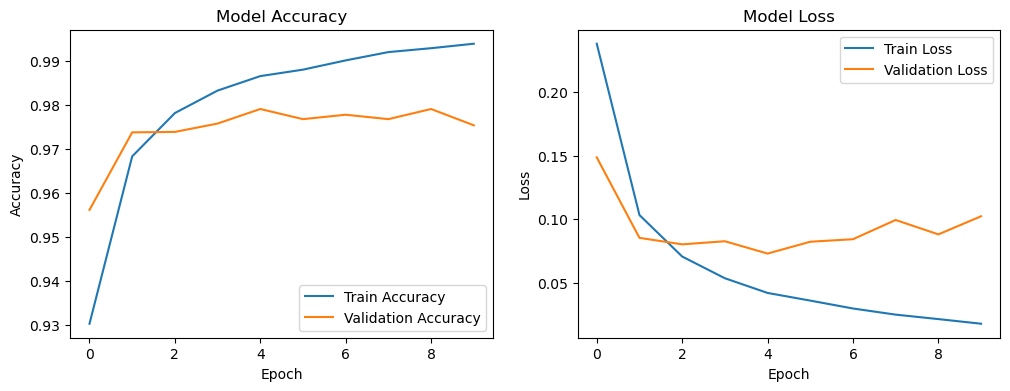

In [22]:
# Plot accuracy and loss curves


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

- Loaded the `MNIST dataset` (handwritten digits 0–9).
- Preprocesses the data (normalization + flattening + one-hot encoding).
- Builds a 3-layer NN (128, 64, 10) using `ReLU + Softmax`.
- Trains with `Adam optimize`r for 10 epochs.
- Evaluates test accuracy (~97%).
- Plots accuracy and loss curves for training vs validation.

## Thank you